In [ ]:
"""
Next, we construct our feature matrix X which is data and vector of labels Y which is labels. Before we do this, we shuffle the data once (with fixed seed to make results reproducible) in order to break up any inherent order the observations might have. This is important to get accuracte approximations of out-of-sample performance with cross-validation.
"""

In [21]:
import numpy as np
names = np.asarray(data.columns,dtype=object) #Features names are stored in list 'names'

In [22]:
numerical_features = []
non_numerical_features_index = []
index = 0
for name in names:
    is_int = np.array_equal(data[name],data[name].astype(int))
    if(is_int == True):
        data = data.astype({name:int})
        non_numerical_features_index.append(index)
    else:
        numerical_features.append(name)
    index += 1
print('Numerical Features are : ',numerical_features)

Numerical Features are :  ['MSTV', 'MLTV']


In [23]:
#Getting Number of unique values in each feature
num_unique = np.zeros((len(data.columns)),dtype=int) #num_unique stores the number of unique values present in each features
i = 0
for name in data.columns:
    value = np.unique(data[name].values)
    num_unique[i] = len(value)
    i += 1
arr = np.zeros((len(num_unique),2),dtype=object)
arr[:,0] = names
arr[:,1] = num_unique
df_num_unique = pd.DataFrame(arr,columns=['Feature Name','Number of Unique Value'])
df_num_unique = df_num_unique.astype({'Number of Unique Value':int})
df_num_unique

,Feature Name,Number of Unique Value
0,e,1064
1,LBE,48
2,LB,48
3,AC,22
4,FM,96
5,UC,19
6,ASTV,75
7,MSTV,57
8,ALTV,87
9,MLTV,249


In [24]:
data.isnull().any()

e           False
LBE         False
LB          False
AC          False
FM          False
UC          False
ASTV        False
MSTV        False
ALTV        False
MLTV        False
DL          False
DS          False
DP          False
Width       False
Max         False
Nmax        False
Nzeros      False
Mode        False
Mean        False
Variance    False
Tendency    False
dtype: bool

In [25]:
names_categorical = names[(num_unique <= 5)] #Categorical Features
print('Categorical Features are : ',names_categorical)


Categorical Features are :  ['DS' 'DP' 'Tendency']


In [26]:
data=pd.concat([data,labels],axis=1)

In [27]:
for name in names_categorical: #Making minimum value in categorical features = 0
    data[name] -= data[name].min()

In [28]:
 #Storing Data of Categorical features in categorical_data
categorical_data = np.zeros((data.shape[0],len(names_categorical))) 
i = 0
for name in names_categorical:
    arr = np.asarray(data[name].values)
    categorical_data[:,i] = arr #Adding Categorical feature to categorical_data
    data = data.drop([name],axis=1) #Dropping Categorical feature from data
    i += 1
df_Categorical = pd.DataFrame(categorical_data,columns=names_categorical)
data = pd.concat([data,df_Categorical],axis=1) #Appending all categorical features at end of data
data.dropna(inplace = True)
labels=data.NSP
data=data.drop(columns=['NSP'])
# labels.dropna(inplace=True)

In [29]:
data

,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,Width,Max,Nmax,Nzeros,Mode,Mean,Variance,DS,DP,Tendency
0,1184.0,133.0,133.0,2.0,12.0,3.0,46.0,1.1,0.0,15.4,...,69.0,164.0,5.0,0.0,139.0,135.0,9.0,0.0,0.0,1.0
1,1744.0,125.0,125.0,3.0,1.0,4.0,60.0,1.9,0.0,6.7,...,90.0,164.0,6.0,1.0,130.0,121.0,26.0,0.0,0.0,1.0
2,1181.0,131.0,131.0,5.0,2.0,3.0,57.0,2.0,0.0,1.2,...,69.0,169.0,6.0,1.0,133.0,133.0,15.0,0.0,0.0,1.0
3,1072.0,115.0,115.0,5.0,0.0,10.0,17.0,2.0,0.0,6.8,...,89.0,169.0,3.0,1.0,121.0,115.0,25.0,0.0,1.0,1.0
4,552.0,129.0,129.0,0.0,1.0,3.0,58.0,4.3,0.0,0.0,...,158.0,230.0,10.0,1.0,111.0,88.0,33.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1182.0,146.0,146.0,0.0,3.0,0.0,78.0,0.2,57.0,4.3,...,12.0,149.0,1.0,0.0,144.0,143.0,0.0,0.0,0.0,2.0
2122,1014.0,115.0,115.0,1.0,0.0,3.0,19.0,1.7,0.0,14.2,...,59.0,148.0,1.0,1.0,120.0,118.0,5.0,0.0,0.0,1.0
2123,968.0,144.0,144.0,0.0,1.0,1.0,83.0,0.3,31.0,5.8,...,38.0,170.0,2.0,0.0,144.0,144.0,0.0,0.0,0.0,1.0
2124,1542.0,130.0,130.0,10.0,1.0,4.0,52.0,1.3,0.0,2.4,...,99.0,172.0,6.0,0.0,144.0,141.0,16.0,0.0,1.0,1.0


In [30]:
labels

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    1.0
2123    3.0
2124    1.0
2125    1.0
Name: NSP, Length: 2123, dtype: float64

In [31]:
num_class,freq_class = np.unique(labels.values,return_counts=True) #Getting number of classes and frequency of each class
arr = np.zeros((len(num_class),2))
arr[:,0] = num_class
arr[:,1] = freq_class/labels.shape[0]
arr = np.around(arr,2)
df_classes = pd.DataFrame(arr,columns=['Class','Frequency of Class'])
df_classes

,Class,Frequency of Class
0,1.0,0.78
1,2.0,0.14
2,3.0,0.08


<font size="4">Outlier treatment</font> <br>

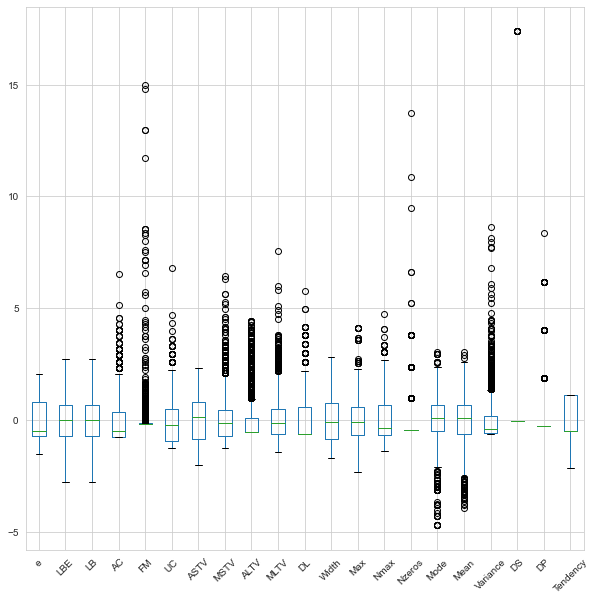

In [32]:
# Boxplots for feature distributions
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
from sklearn import preprocessing 
data_scale_X = pd.DataFrame(sklearn.preprocessing.scale(data), columns=data.columns)
data_scale_X.boxplot(ax=ax, rot=45)
plt.show()

In [ ]:
"""
As we can see, there are quite a few observations where a feature value is more than five standard deviations away from the feature mean. These outliers might represent instrument error; but they might also be caused by fat-tails of the true distributions, in which case these values are informative. If the outliers are errors, this can negatively impact the performance of our classifiers.
"""

In [ ]:
"""
To deal with the potential problem of measurement error, we simply flag feature values with absolute z-scores above a threshold value zcrit as errors. The errors are then treated as missing values and imputed via a k-Nearest Neighbors approach. Specifically, a missing feature value of a given observations is imputed as the average value of that feature of the 5 nearest neighbors, where nearest neighbors are observations closest in terms of euclidean distance of the feature matrix.
"""

In [33]:
#Removing Outliers using Inter Quartile Range (IQR)
mask = np.zeros(data.shape[0],dtype=bool)
mask[:] = False
num_outliers_features = pd.DataFrame(columns=['Feature Name','Number of Outliers'])
for name in names:
    if((name not in names_categorical)&(name != 'V14')&(name != 'V15')&(name !='V20')):
        Q1 = np.percentile(data[name],25,interpolation = 'midpoint')
        Q3 = np.percentile(data[name],75,interpolation = 'midpoint')
        IQR = Q3-Q1
        # Upper bound
        upper = np.asarray([data[name] >= (Q3+3*IQR)])
        # Lower bound
        lower = np.asarray([data[name] <= (Q1-3*IQR)])
        outliers = upper|lower
        num_outliers = np.sum(np.where(outliers==True,1,0))
        dic = {'Feature Name':name,'Number of Outliers':num_outliers}
        num_outliers_features = num_outliers_features.append(dic,ignore_index=True)
        mask = mask|lower
        mask = mask|upper
num_outliers_features

,Feature Name,Number of Outliers
0,e,0
1,LBE,0
2,LB,0
3,AC,17
4,FM,247
5,UC,2
6,ASTV,0
7,MSTV,19
8,ALTV,171
9,MLTV,9


In [34]:
data.shape[0]

2123

In [35]:
from sklearn import preprocessing
def zscore_outlier_removal(X, threshold=100):
    """ Sets feature values in X that are more than (threshold * feature standard deviation) away from feature mean
    to NaN. Returns X with original length but some column values are NaN. At default value 100, no outlier treatment occurs.
    """
    new_X = copy.deepcopy(X)
    new_X[abs(preprocessing.scale(X)) > threshold] = np.nan

    return new_X
# Make zscore feature outlier removal a transformer function
zscore_outlier_removal = preprocessing.FunctionTransformer(zscore_outlier_removal,
    kw_args=dict(threshold=7))


# Replace feature outliers with imputed values via KNN
from sklearn.impute import KNNImputer
KNN_impute = KNNImputer()

In [36]:
data

,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,...,Width,Max,Nmax,Nzeros,Mode,Mean,Variance,DS,DP,Tendency
0,1184.0,133.0,133.0,2.0,12.0,3.0,46.0,1.1,0.0,15.4,...,69.0,164.0,5.0,0.0,139.0,135.0,9.0,0.0,0.0,1.0
1,1744.0,125.0,125.0,3.0,1.0,4.0,60.0,1.9,0.0,6.7,...,90.0,164.0,6.0,1.0,130.0,121.0,26.0,0.0,0.0,1.0
2,1181.0,131.0,131.0,5.0,2.0,3.0,57.0,2.0,0.0,1.2,...,69.0,169.0,6.0,1.0,133.0,133.0,15.0,0.0,0.0,1.0
3,1072.0,115.0,115.0,5.0,0.0,10.0,17.0,2.0,0.0,6.8,...,89.0,169.0,3.0,1.0,121.0,115.0,25.0,0.0,1.0,1.0
4,552.0,129.0,129.0,0.0,1.0,3.0,58.0,4.3,0.0,0.0,...,158.0,230.0,10.0,1.0,111.0,88.0,33.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,1182.0,146.0,146.0,0.0,3.0,0.0,78.0,0.2,57.0,4.3,...,12.0,149.0,1.0,0.0,144.0,143.0,0.0,0.0,0.0,2.0
2122,1014.0,115.0,115.0,1.0,0.0,3.0,19.0,1.7,0.0,14.2,...,59.0,148.0,1.0,1.0,120.0,118.0,5.0,0.0,0.0,1.0
2123,968.0,144.0,144.0,0.0,1.0,1.0,83.0,0.3,31.0,5.8,...,38.0,170.0,2.0,0.0,144.0,144.0,0.0,0.0,0.0,1.0
2124,1542.0,130.0,130.0,10.0,1.0,4.0,52.0,1.3,0.0,2.4,...,99.0,172.0,6.0,0.0,144.0,141.0,16.0,0.0,1.0,1.0


In [37]:
labels

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    1.0
2123    3.0
2124    1.0
2125    1.0
Name: NSP, Length: 2123, dtype: float64

### Train-Test Split

In [38]:
from sklearn.model_selection import train_test_split 
Xtrain,Xtest,Ytrain,Ytest = train_test_split(data,labels,test_size=0.40,random_state=24) #Splitting Training and Testing Data with test␣size = 0.4*(total data size)
Xtrain.reset_index(inplace=True,drop=True)
Xtest.reset_index(inplace=True,drop=True)
Ytrain.reset_index(inplace=True,drop=True)
Ytest.reset_index(inplace=True,drop=True)